In [373]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import  numpy as np
import sklearn.model_selection 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [374]:
df = pd.read_csv('Train.csv') 
crypto_currency_test_data = pd.read_csv('Test.csv')
pd.set_option('display.max_columns', None)

In [375]:
df.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [376]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [393]:

df.corr().head()
  

/var/folders/54/kspckfhj2g76qkfs4ymck2hr0000gn/T/ipykernel_817/605608786.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().head()


,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
asset_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open,NaN,1.000000,0.999963,0.999960,0.337345,0.999933,0.563476,0.525827,0.657878,0.205746,0.712354,0.045191,0.596418,0.751891,0.596930,0.110773,0.127560,0.354616,0.412973,0.532267,0.700638,0.383794,0.568303,0.466400,0.450540,0.509266,0.374674,0.485231,0.565511,0.574049,-0.083141,0.056628,0.017225,-0.040648,0.047030,0.012541,0.090035,-0.010308,0.084607,0.787618,0.031425,-0.035377,0.17916,-0.113232,0.613931,0.095792,0.998845,0.999936
high,NaN,0.999963,1.000000,0.999931,0.338505,0.999959,0.563961,0.526258,0.658578,0.207125,0.713574,0.045351,0.597544,0.751772,0.598324,0.111227,0.127916,0.355644,0.414385,0.533622,0.701698,0.384863,0.569302,0.467644,0.451653,0.510747,0.375776,0.486460,0.566920,0.575534,-0.083155,0.057122,0.017542,-0.040712,0.047143,0.012778,0.091499,-0.010290,0.083814,0.787993,0.031635,-0.035424,0.17974,-0.113125,0.615052,0.096045,0.998786,0.999971
low,NaN,0.999960,0.999931,1.000000,0.335993,0.999948,0.563068,0.525413,0.657192,0.205025,0.711304,0.045036,0.595770,0.751877,0.595821,0.110571,0.127374,0.353973,0.412305,0.531167,0.699747,0.383171,0.567800,0.465382,0.449498,0.508015,0.373743,0.484362,0.564321,0.572874,-0.083023,0.056322,0.017083,-0.040737,0.046966,0.012382,0.088835,-0.010291,0.084564,0.787416,0.031582,-0.035330,0.17940,-0.113334,0.613271,0.096974,0.998942,0.999956
volume,NaN,0.337345,0.338505,0.335993,1.000000,0.334162,0.257607,0.215693,0.334899,0.149402,0.312697,0.017462,0.311537,0.269873,0.298530,0.081921,0.069409,0.214134,0.234240,0.298566,0.313339,0.276608,0.286379,0.289768,0.209841,0.241013,0.215584,0.266849,0.259014,0.298793,-0.024430,0.127744,0.049970,-0.002963,0.046300,0.054714,0.180840,-0.005242,-0.011421,0.250067,-0.005235,-0.037928,0.05571,-0.068015,0.317245,0.062920,0.331900,0.337529


In [378]:
df.shape

(12632, 49)

In [379]:
df.columns 

Index(['id', 'asset_id', 'open', 'high', 'low', 'volume', 'market_cap',
       'url_shares', 'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news',
       'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank', 'medium', 'youtube', 'social_volume',
       'percent_change_24h', 'market_cap_global', 'close'],
      dtype='object')

In [380]:
df.nunique()

id                         12632
asset_id                       1
open                        8581
high                        8580
low                         8581
volume                      8568
market_cap                  8346
url_shares                  2128
unique_url_shares           1342
reddit_posts                 202
reddit_posts_score          1502
reddit_comments              471
reddit_comments_score       1330
tweets                      5119
tweet_spam                  3174
tweet_followers             8536
tweet_quotes                 744
tweet_retweets              2948
tweet_replies               1926
tweet_favorites             5445
tweet_sentiment1             650
tweet_sentiment2            1463
tweet_sentiment3            1533
tweet_sentiment4            4373
tweet_sentiment5             843
tweet_sentiment_impact1     7764
tweet_sentiment_impact2     8534
tweet_sentiment_impact3     8535
tweet_sentiment_impact4     8549
tweet_sentiment_impact5     8531
social_sco

/var/folders/54/kspckfhj2g76qkfs4ymck2hr0000gn/T/ipykernel_817/3862358323.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


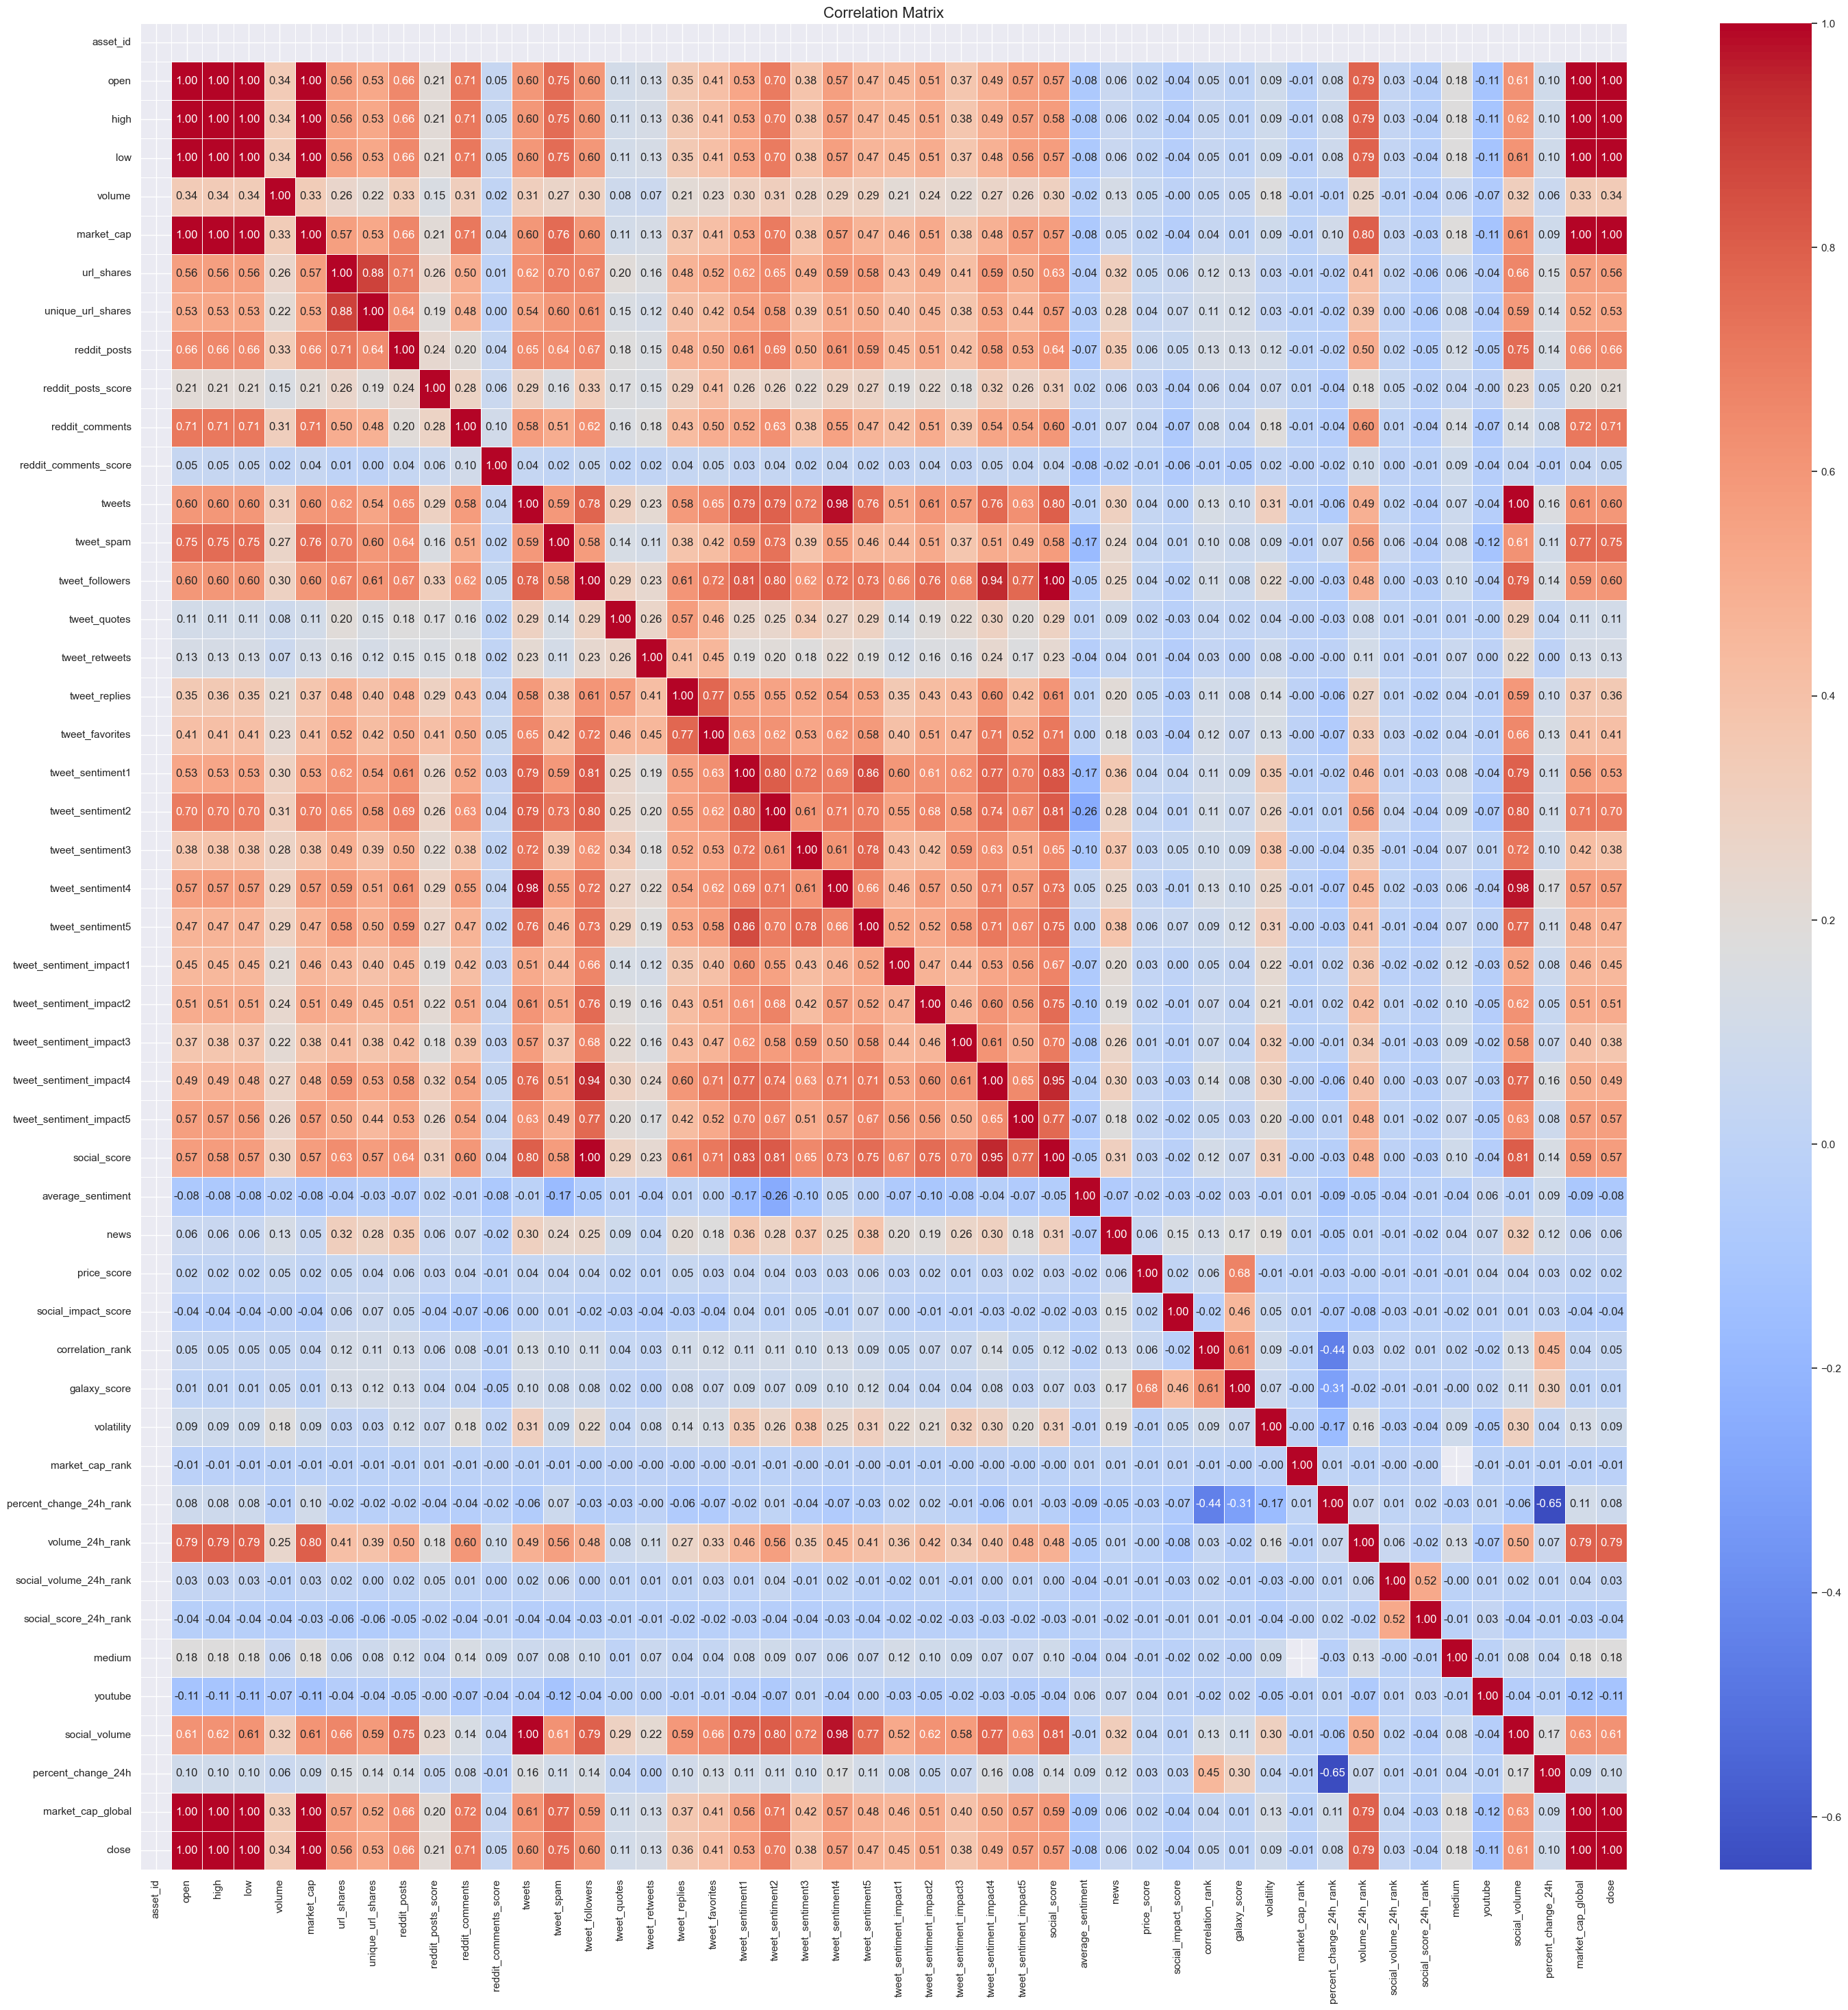

In [381]:
def plotCorrelationMatrix(df_cleaned, figure_size):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create a heatmap using Seaborn
    plt.figure(figsize=figure_size)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

# Example usage with a figure size of (8, 8)
plotCorrelationMatrix(df, (35, 35))

In [382]:
df_cleaned = df.drop(['open','high','tweet_spam','reddit_comments','low','tweet_followers','market_cap_rank','url_shares','social_volume', 'social_score', 'volume_24h_rank', 'market_cap_global','reddit_comments_score','tweet_sentiment1','tweet_sentiment2','tweet_sentiment3','tweet_sentiment4','tweet_sentiment4','tweet_sentiment5','tweet_sentiment1','tweet_sentiment2','tweet_sentiment3','tweet_sentiment4','tweet_sentiment5','tweet_sentiment_impact1',
               'tweet_sentiment_impact2','tweet_sentiment_impact3','tweet_sentiment_impact4','tweet_sentiment_impact5','market_cap','url_shares','galaxy_score','tweets','reddit_posts','social_impact_score','market_cap_rank', 'tweet_replies'], axis=1)

In [383]:
df_cleaned.head()

,id,asset_id,volume,unique_url_shares,reddit_posts_score,tweet_quotes,tweet_retweets,tweet_favorites,average_sentiment,news,price_score,correlation_rank,volatility,percent_change_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,percent_change_24h,close
0,ID_322qz6,1,7.131986e+08,817.0,105.0,39.0,1343.0,2237.0,3.6,69.0,2.7,3.3,0.007118,606.0,1.0,1.0,2.0,5.0,1.434516,9428.279323
1,ID_3239o9,1,4.004755e+08,544.0,531.0,195.0,1070.0,3888.0,3.7,1.0,2.0,1.0,0.009419,NaN,NaN,NaN,NaN,NaN,-2.459507,7967.567267
2,ID_323J9k,1,3.017729e+09,975.0,1152.0,104.0,2014.0,11476.0,3.7,22.0,3.1,3.3,0.013530,692.0,1.0,1.0,NaN,NaN,4.942448,49120.738484
3,ID_323y5P,1,NaN,NaN,424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_324kJH,1,1.150053e+09,638.0,42.0,21.0,511.0,2284.0,3.7,22.0,4.7,4.4,0.010332,749.0,1.0,1.0,NaN,2.0,2.609576,10384.798216


In [384]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   volume                   8605 non-null   float64
 3   unique_url_shares        8575 non-null   float64
 4   reddit_posts_score       12391 non-null  float64
 5   tweet_quotes             8574 non-null   float64
 6   tweet_retweets           8574 non-null   float64
 7   tweet_favorites          8574 non-null   float64
 8   average_sentiment        8584 non-null   float64
 9   news                     8556 non-null   float64
 10  price_score              8584 non-null   float64
 11  correlation_rank         8584 non-null   float64
 12  volatility               8546 non-null   float64
 13  percent_change_24h_rank  8107 non-null   float64
 14  social_volume_24h_rank

In [385]:
df_cleaned.isna().sum()

id                            0
asset_id                      0
volume                     4027
unique_url_shares          4057
reddit_posts_score          241
tweet_quotes               4058
tweet_retweets             4058
tweet_favorites            4058
average_sentiment          4048
news                       4076
price_score                4048
correlation_rank           4048
volatility                 4086
percent_change_24h_rank    4525
social_volume_24h_rank     4525
social_score_24h_rank      4525
medium                     9682
youtube                    7846
percent_change_24h         4319
close                      4015
dtype: int64

/var/folders/54/kspckfhj2g76qkfs4ymck2hr0000gn/T/ipykernel_817/229542825.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cleaned.corr()


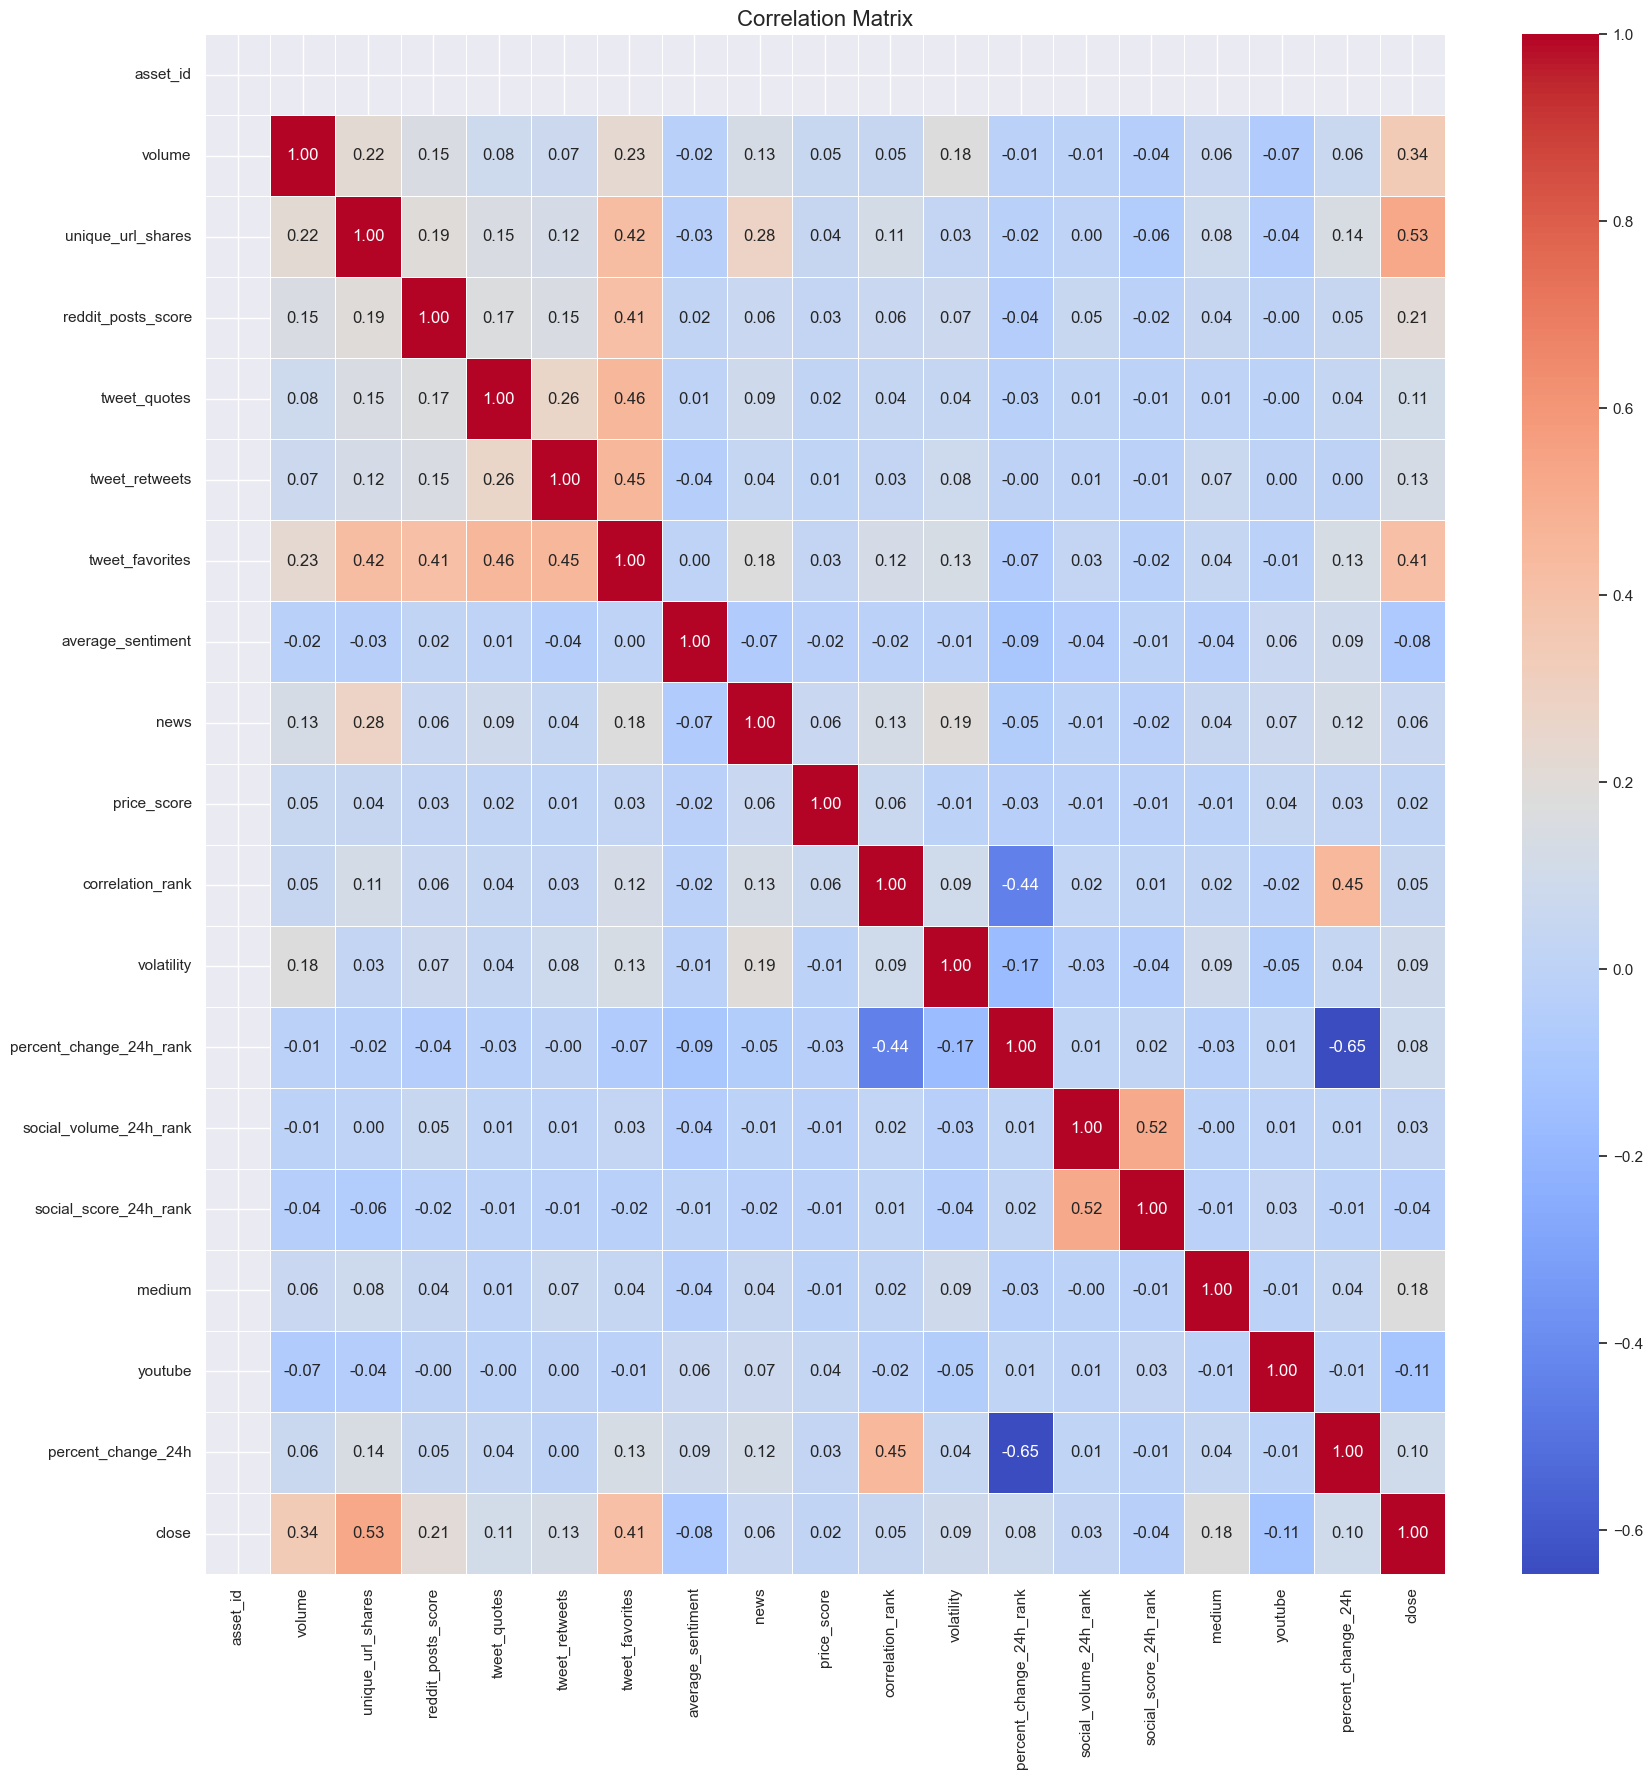

In [386]:
def plotCorrelationMatrix(df_cleaned, figure_size):
    # Calculate the correlation matrix
    corr_matrix = df_cleaned.corr()

    # Create a heatmap using Seaborn
    plt.figure(figsize=figure_size)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

# Example usage with a figure size of (8, 8)
plotCorrelationMatrix(df_cleaned, (20, 20))

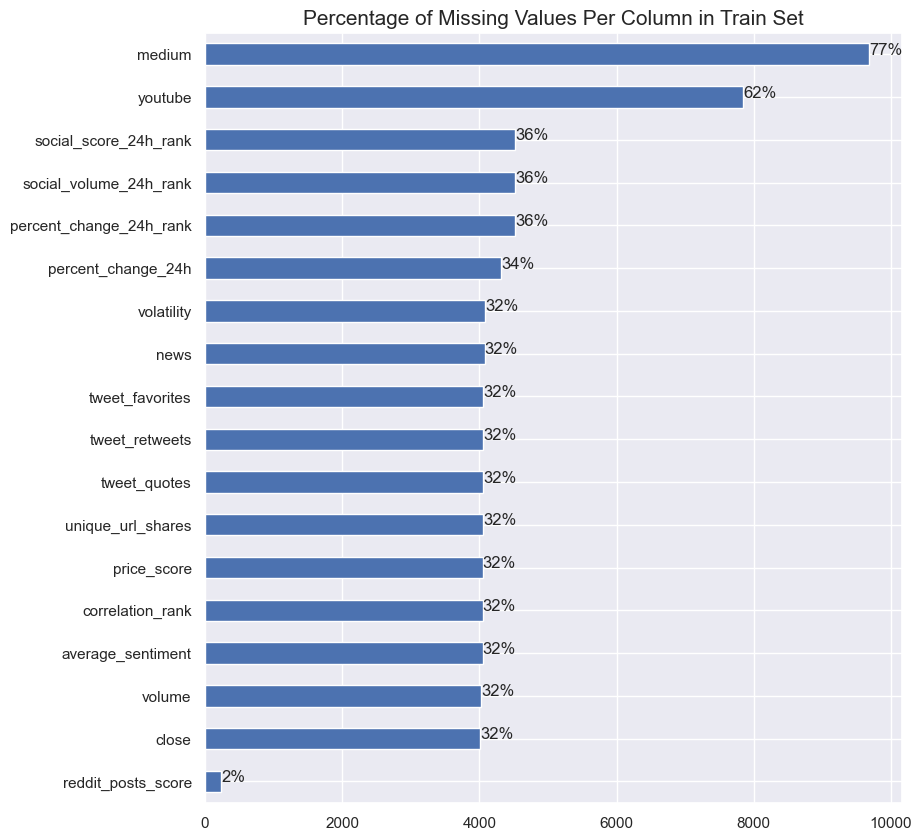

In [395]:
ax = df_cleaned.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df_cleaned.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

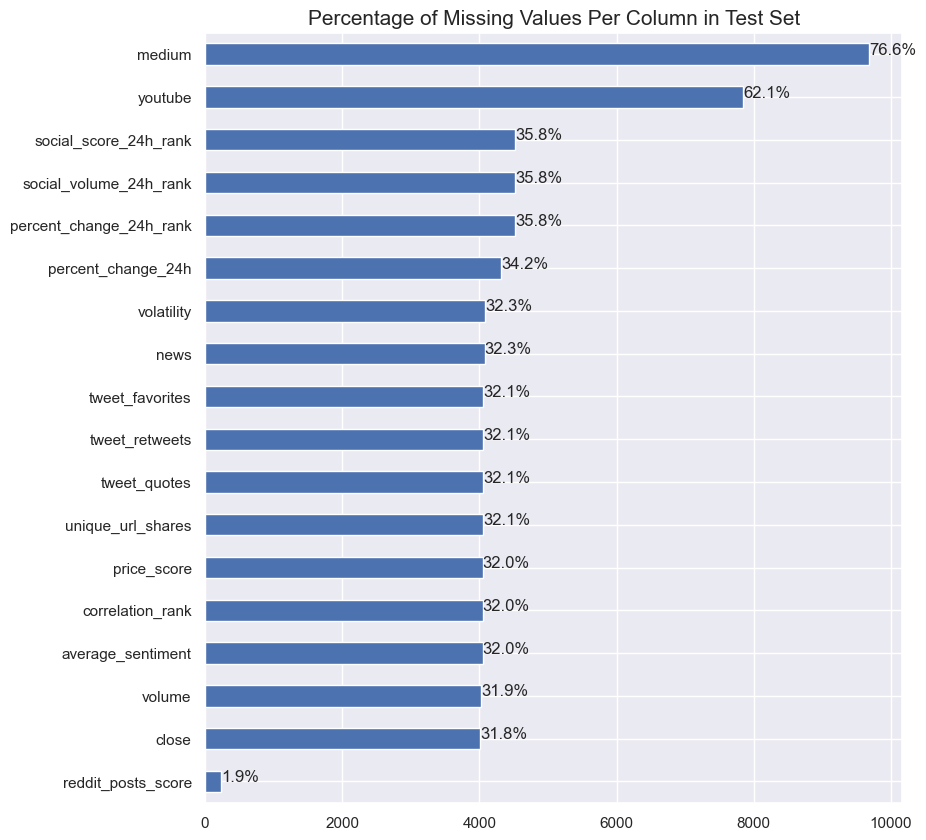

In [394]:
# Check if there missing values in test set
ax = df_cleaned.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df_cleaned.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

# THE DISTRIBUTION BETWEEN THE PRICE AND DIFFERENT FACTORS THAT AFFECT CRYPTOCURRENCY.

This graph distribution it is to show that while the open price can influence cryptocurrency prices, it is just one among many factors affecting the overall market dynamics. Cryptocurrency prices are influenced by a wide range of variables, including market sentiment, fundamental factors, news events, regulatory developments, and broader market trends. Traders and investors typically consider multiple factors in their decision-making process rather than relying solely on the open price.

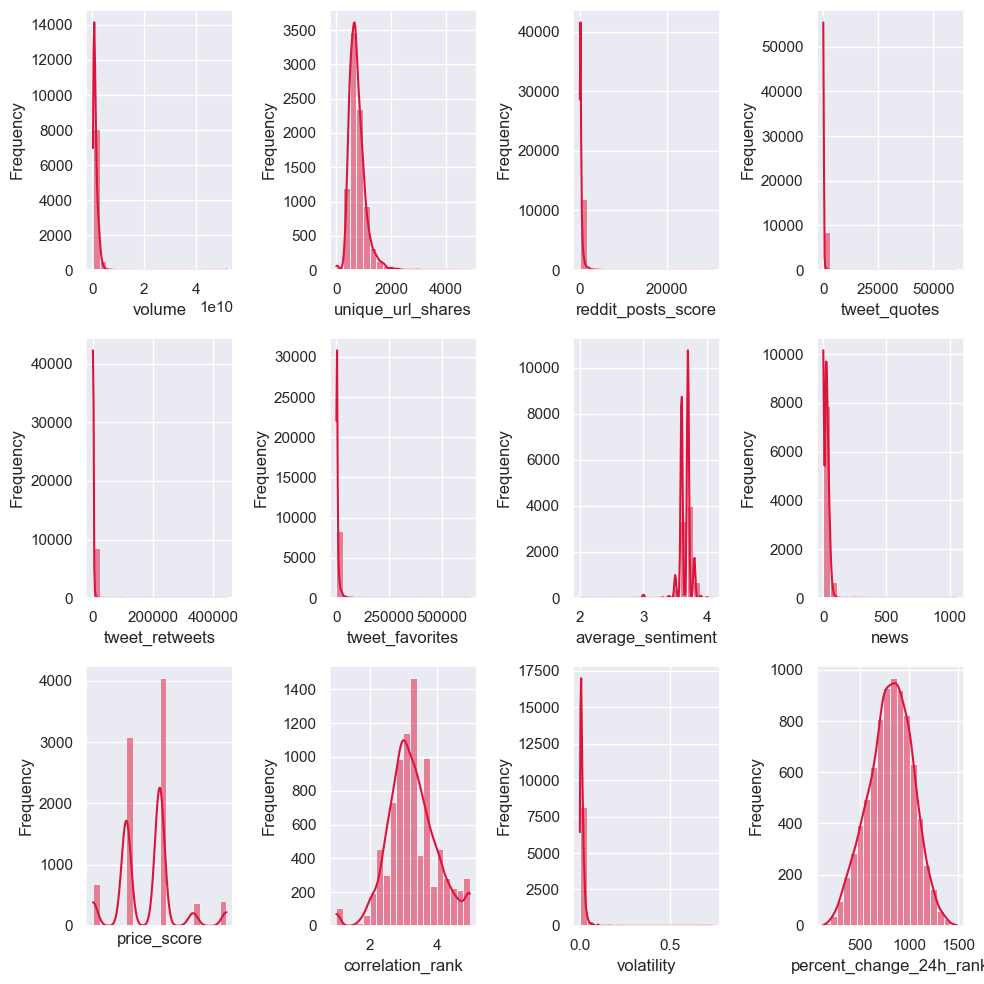

In [392]:
plt.figure(figsize=(10, 10))
sns.set()

num_variables = len(df_cleaned)
num_subplots = min(num_variables, 12)
rows = (num_subplots - 1) // 4 + 1
cols = min(num_subplots, 4)

for i, var in enumerate(df_cleaned.columns[:num_subplots]):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df_cleaned[var], bins=20, kde=True, color='#DC143C')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

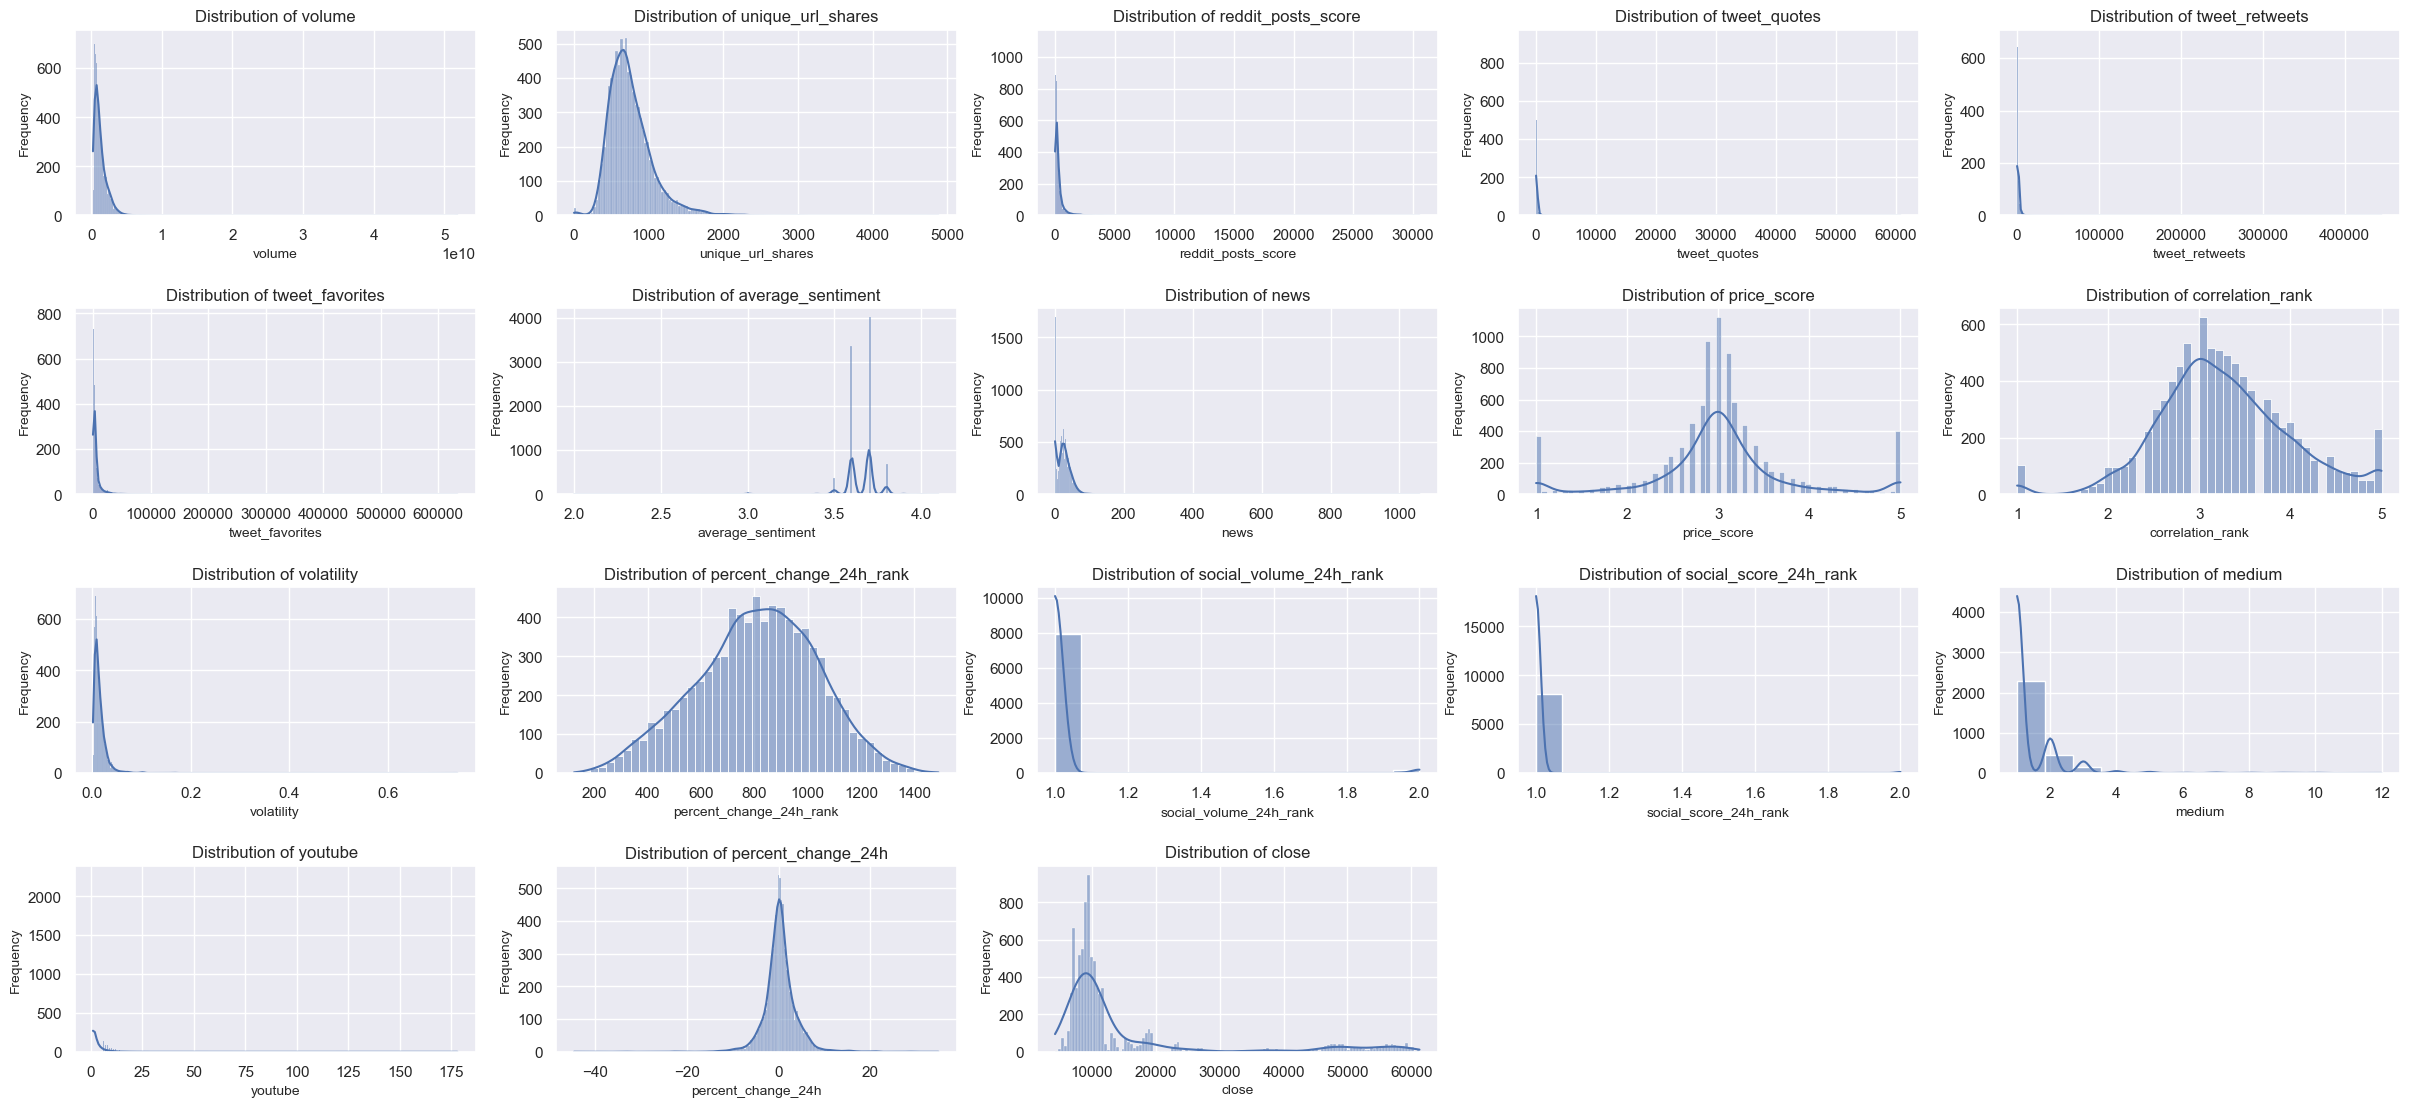

In [400]:
def plotPerColumnDistribution(df_cleaned, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(30, 35))
    fig.subplots_adjust(hspace=0.5)

    for i, column in enumerate(df_cleaned.columns):
        ax = axes[i // cols, i % cols]
        sns.histplot(df[column], ax=ax, kde=True)
        ax.set_title(f'Distribution of {column}', fontsize=12)
        ax.set_xlabel(column, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)

    # Remove any empty subplots
    if i+1 < rows*cols:
        for j in range(i+1, rows*cols):
            fig.delaxes(axes.flatten()[j])

    plt.show()

# Example usage with 10 rows and 5 columns
plotPerColumnDistribution(df_cleaned, 10, 5)